<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/combined(w2v).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [218]:
url0='https://raw.githubusercontent.com/alfinmaulani/skripsi/master/dataISEAR.csv'
df = pd.read_csv(url0)

In [219]:
df=df.drop(df[df['emosi'] == 'shame'].sample(frac=1).index)
df=df.drop(df[df['emosi'] == 'guilt'].sample(frac=1).index)

In [182]:
df.emosi.value_counts()

joy        1092
sadness    1082
anger      1079
fear       1076
disgust    1066
Name: emosi, dtype: int64

In [220]:
df1 = pd.read_csv(url0)

In [221]:
df1=df1.drop(df1[df1['emosi'] == 'joy'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'sadness'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'anger'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'fear'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'disgust'].sample(frac=1).index)

In [185]:
df1.emosi.value_counts()

shame    1071
guilt    1050
Name: emosi, dtype: int64

In [222]:
df2=pd.read_csv('https://raw.githubusercontent.com/alfinmaulani/skripsi/master/korpus2.txt', delimiter = ";")
df2.columns=['dok','tes']

In [223]:
df3=pd.read_csv('https://raw.githubusercontent.com/alfinmaulani/skripsi/master/korpus3.csv')

In [206]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [224]:
df4 = pd.read_csv('/content/drive/MyDrive/twitter_prosessed.csv')

In [ ]:
# df3 = pd.read_csv('/content/drive/MyDrive/idwiki_new_lower.txt', delimiter = "\t")
# df3.columns = ["arti"]

persiapan corpus tambahan

In [225]:
final=[]

In [226]:
final.extend(df1.dokumen)

In [227]:
final.extend(df2.dok)

In [228]:
final.extend(df3.content)

In [229]:
final.extend(df4.tweet)

In [230]:
dfg = pd.DataFrame(final)
dfg.columns=["dok"]

preputama : lower case

In [60]:
def lower(temp):
  return temp.str.lower()

In [231]:
df['dokumen']=lower(df['dokumen'])

In [232]:
dfg['dok']=lower(dfg['dok'])

preputama : Pembersihan noise (over enter and space)

In [63]:
def bersih_noise(temp):
  temp=temp.replace(' \n', ' ', regex=True)
  temp=temp.replace('   ', ' ', regex=True)
  return temp.replace('  ', ' ', regex=True)

In [155]:
df=bersih_noise(df)

In [156]:
dfg=bersih_noise(dfg)

preptambah : expand contractions

In [67]:
!pip install contractions
import contractions
def expand_word(temp):
  expanded_words = []   
  for word in temp:
    expanded_words.append(contractions.fix(word))
  return expanded_words

In [157]:
df.dokumen=expand_word(df.dokumen)

In [158]:
dfg.dok=expand_word(dfg.dok)

preputama : cleansing punctuation

In [70]:
def clns_punc(temp):
  return temp.str.replace(r'[^\w\s]+', '')

In [159]:
df['dokumen'] = clns_punc(df['dokumen'])

In [160]:
dfg['dok'] = clns_punc(dfg['dok'])

preputama : cleansing number

In [73]:
!pip install tweet-preprocessor
import preprocessor as p
p.set_options(p.OPT.NUMBER)
def clns_numb(temp):
  sementara=[]
  for word in temp:
    sementara.append(p.clean(word))
  return sementara

In [161]:
df.dokumen=clns_numb(df.dokumen)

In [162]:
dfg.dok=clns_numb(dfg.dok)

preptambah : remove stopword

In [76]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
pat = r'\b(?:{})\b'.format('|'.join(stop))
def remove_stopw(temp):
  temp=temp.str.replace(pat, '')
  return temp.str.replace(r'\s+', ' ')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [163]:
df['dokumen'] = remove_stopw(df['dokumen'])

In [164]:
dfg['dok'] = remove_stopw(dfg['dok'])

tokenizing

In [79]:
def token(temp):
  return [word_tokenize(x) for x in temp]

In [233]:
df.dokumen=token(df.dokumen)

In [234]:
dfg.dok=token(dfg.dok)

preptambah : Lemmatization

In [83]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def lemma(temp):
  temp.apply(lambda x: [stemmer.stem(y) for y in x])

In [167]:
lemma(df['dokumen'])

In [168]:
lemma(dfg['dok'])

save df

In [ ]:
# df.to_csv(r'dataisear(preptambah).csv', index = False)

gabung corpus

In [ ]:
# sent=df.dokumen

In [235]:
sent=dfg.dok.append(df.dokumen,ignore_index=True)

word2ec

In [87]:
from gensim.models import Word2Vec

In [236]:
w2v = Word2Vec(sent, window=5, min_count=1, workers=12, sg=1, iter=1)

In [ ]:
# (sentences=None, corpus_file=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, 
#  seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=hash, iter=5, 
#  null_word=0, trim_rule=None, sorted_vocab=1, batch_words=MAX_WORDS_IN_BATCH, compute_loss=False, callbacks=(), max_final_vocab=None)

cek model

In [171]:
w2v.wv.vectors.shape

(9044, 100)

In [172]:
w2v.wv["moment"]

array([ 0.0097433 ,  0.01558062,  0.00356943, -0.04014386, -0.02008186,
        0.00774115,  0.03769105,  0.00493415, -0.00040249, -0.01661908,
        0.00331305,  0.01287465, -0.00731828,  0.00179786, -0.0231971 ,
        0.00121176,  0.00844907,  0.04813444, -0.00340753, -0.02354696,
        0.00939662, -0.02315259, -0.01654048,  0.02212317,  0.013449  ,
        0.03443569, -0.03741311,  0.03061974, -0.01038642, -0.02705098,
       -0.03470333, -0.00371535,  0.02233285, -0.01638679, -0.02737356,
        0.01447797, -0.00163913, -0.00838686, -0.02463311, -0.04161251,
       -0.00128063, -0.00298327, -0.00186809,  0.00345055,  0.00629437,
       -0.00282509,  0.01375109, -0.0088288 , -0.0191032 ,  0.00795719,
        0.00436141,  0.03149242,  0.02711986, -0.03038922,  0.01338605,
       -0.04980749,  0.01346228, -0.03698028,  0.01027556,  0.02515476,
        0.01142163, -0.00685239,  0.00735163,  0.03628206,  0.00092071,
       -0.01604332, -0.01275397,  0.00194377, -0.04504337, -0.00

ekstraksi fitur

In [237]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)
for senten in df.dokumen:
  for word in senten:
    temp=np.add(temp,w2v.wv[word])
  temp=temp/len(senten)
  ekstrak.append(temp)
has_vec=ekstrak

In [238]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(5395, 100)
(5395,)


klasifikasi svm

In [93]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [ ]:
# langsung cari score

# clf = svm.SVC(kernel='poly', decision_function_shape='ovr')
# scores = cross_val_score(clf, X, y, cv=10)
# # scores.mean()

conf matrix dan akurasi

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
# svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
#  class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [243]:
# cross_val_predict(estimator, X, y=None, *, groups=None, cv=None, n_jobs=None, verbose=0, fit_params=None, 
# pre_dispatch='2*n_jobs', method='predict')

In [239]:
def klasifikasi(krnl):
  clf = svm.SVC(kernel=krnl, decision_function_shape='ovr')
  y_pred = cross_val_predict(clf, X, y, cv=10)
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

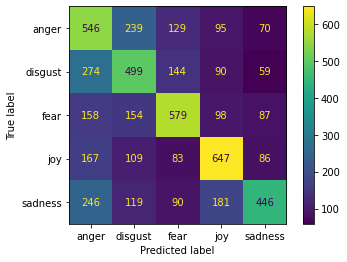

0.5036144578313253
(0.5163104095735489, 0.5033847448151979, 0.5049251082742024, None)


In [240]:
klasifikasi('poly')

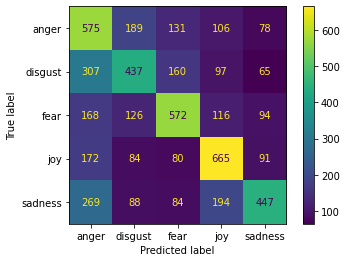

0.49972196478220576
(0.5113686574947912, 0.49930825312898125, 0.49959526243640784, None)


In [241]:
klasifikasi('rbf')

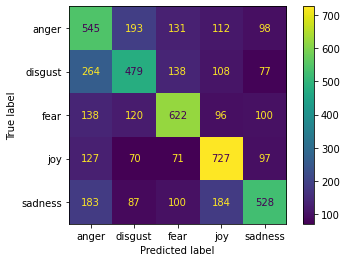

0.5377201112140871
(0.5406339833561618, 0.5372487389463686, 0.5367371162153061, None)


In [242]:
klasifikasi('linear')